### Mount GDrive

In [ ]:
import os.path as path
if not path.exists("/content/gdrive"):
    !sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
    !sudo apt-get update -qq 2>&1 > /dev/null
    !sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
    !google-drive-ocamlfuse

    !sudo apt-get install -qq w3m # to act as web browser 
    !xdg-settings set default-web-browser w3m.desktop # to set default browser
    %cd /content
    !mkdir gdrive
    %cd gdrive
    !mkdir MyDrive
    %cd ..
    %cd ..
    !google-drive-ocamlfuse /content/gdrive/MyDrive



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

### LXMERT Code

In [ ]:
path = '/content/gdrive/MyDrive/QA/Project/lxmert'

In [ ]:
%cd '/content/gdrive/MyDrive/QA/Project/lxmert'

/content/gdrive/MyDrive/.shared/Project/lxmert


In [ ]:
!mkdir -p snap/pretrained 

In [ ]:
!pip install torch==1.4.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
torch.__version__

'1.7.1'

#### Get Dataset

In [ ]:
!mkdir -p data/gqa
!wget https://nlp.cs.unc.edu/data/lxmert_data/gqa/train.json -P data/gqa/
!wget https://nlp.cs.unc.edu/data/lxmert_data/gqa/valid.json -P data/gqa/
!wget https://nlp.cs.unc.edu/data/lxmert_data/gqa/testdev.json -P data/gqa/

In [ ]:
import torch
torch.cuda.is_available() # True


True

### Create new train and valid json

In [ ]:
%cd data/gqa

/content/gdrive/MyDrive/QA/Project/lxmert/data/gqa


In [ ]:
!ls

testdev.json  train_sceneGraphs.json   valid.json
test.json     trainval_ans2label.json  val_sceneGraphs.json
train.json    trainval_label2ans.json


In [ ]:
import json

with open('val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('valid.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            if attribute_text:
                object_text = f"{attribute_text} {object_name}"
            else:
                object_text = object_name
            object_texts.append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                relation_text = f"{object_name} {relation_name} {related_object_name}"
                relation_texts.append(relation_text)
        scene_text = ', '.join(object_texts + relation_texts)
        question['sent'] += f" ({scene_text})"

# save dictionary as JSON file
with open("valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
with open('train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('train.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            if attribute_text:
                object_text = f"{attribute_text} {object_name}"
            else:
                object_text = object_name
            object_texts.append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                relation_text = f"{object_name} {relation_name} {related_object_name}"
                relation_texts.append(relation_text)
        scene_text = ', '.join(object_texts + relation_texts)
        question['sent'] += f" ({scene_text})"

# save dictionary as JSON file
with open("train.json", "w") as outfile:
    json.dump(questions, outfile)    

### Run Commands

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_results --load snap/gqa/gqa_lxr955_results/BEST --test testdev --batchSize 1024
# On testdev-set

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_results --load snap/gqa/gqa_lxr955_results/BEST --test valid --batchSize 16
# On validation-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 462 seconds.
Use 4003 data in torch dataset

100% 231508/231508 [00:00<00:00, 2574059.21B/s]
100% 407873900/407873900 [00:07<00:00, 58161763.25B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 2500
Load model from snap/gqa/gqa_lxr955_results/BEST
Load 132062 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1240 seconds.
Use 132062 data in torch dataset

0.9457830412987839


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_tiny --tiny
# Finetune test tiny

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 201 seconds.
Use 4003 data in torch dataset

Load 132062 data from split(s) valid.
Use 307 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 500
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 125/125 [01:15<00:00,  1.65it/s]

Epoch 0: Train 34.02
Epoch 0: Valid 76.87
Epoch 0: Best 76.87
100% 125/125 [01:16<00:00,  1.63it/s]

Epoch 1: Train 78.67
Epoch 1: Valid 77.85
Epoch 1: Best 77.85
100% 125/125 [01:17<00:00,  1.61it/s]

Epoch 2: Train 89.70
Epoch 2: Valid 78.18
Epoch 2: Best 78.18
100% 125/125 [01:17<00:00,  1.60it/s]

Epoch 3: Train 92.77
Epoch 3: Valid 78.18
Epoch 3: Best 78.18


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg 
# Finetune test with sg added

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1240 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 29468/29468 [5:05:47<00:00,  1.61it/s]

Epoch 0: Train 77.21
Epoch 0: Valid 83.17
Epoch 0: Best 83.17
100% 29468/29468 [5:07:30<00:00,  1.60it/s]

Epoch 1: Train 86.45
Epoch 1: Valid 83.69
Epoch 1: Best 83.69
100% 29468/29468 [5:07:33<00:00,  1.60it/s]

Epoch 2: Train 90.19
Epoch 2: Valid 83.68
Epoch 2: Best 83.69
100% 29468/29468 [5:07:12<00:00,  1.60it/s]

Epoch 3: Train 92.53
Epoch 3: Valid 83.82
Epoc

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_sg_results --load snap/gqa/gqa_lxr955_sg/BEST --test testdev --batchSize 1024
# run sg finetuned on testdev-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 417 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg/BEST
Load 12578 data from split(s) testdev.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv
Loaded 398 images in file data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv in 4 seconds.
Use 12578 data in torch dataset

0.593735093019558


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_onlytrain
# Finetune on only train json

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1427 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

100% 231508/231508 [00:00<00:00, 2736301.60B/s]
100% 407873900/407873900 [00:05<00:00, 76011044.35B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 29468/29468 [3:54:20<00:00,  2.10it/s]

Epoch 0: Train 77.79
Epoch 0: Valid 83.24
Epoch 0: Best 83.24
100% 29468/29468 [3:54:48<00:00,  2.09it/s]

Epoch 1: Train 86.49
Epoch 1: Valid 83.66
Epoch 1: Best 83.66
100% 29468/29468 [3:54:49<00:00,  2.09it/s]

Epoch 2: Train 90.19
Epoch 2: Valid 83.61
Epoch 2:

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_onlytrain_results --load snap/gqa/gqa_lxr955_onlytrain/BEST --test testdev --batchSize 1024
# On testdev-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 241 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 12578 data from split(s) testdev.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv
Loaded 398 images in file data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv in 4 seconds.
Use 12578 data in torch dataset

0.5965972332644299


In [ ]:
import gc
gc.collect()

0

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Sun Mar 12 16:20:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls

 data			        requirements.txt
 data_old		        run
 experience_in_pretraining.md  'Run terminal commands.ipynb'
 image_feature_zips	        script_alternative.sh
 LICENSE		        script.sh
 prepare_dataset.ipynb	        snap
 pre_trained_faster_rcnn        src
 README.md


### Change to graph representation

In [ ]:
%cd data/gqa

/content/gdrive/MyDrive/QA/Project/lxmert/data/gqa


In [ ]:
import json 
with open('val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('valid_new.json') as f:
    questions = json.load(f)
    
for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_groups = {}
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name not in object_groups:
                object_groups[object_name] = []
            object_groups[object_name].append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                if related_object_name != object_name and related_object_name in object_groups:
                    object_texts = object_groups[related_object_name]
                    object_text = object_texts[0]
                    if ', '.join(object_groups[object_name])[-1] == 's':
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} are {relation_name} {object_text}"
                    else:
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} is {relation_name} {object_text}"
                    relation_texts.append(relation_text)
        if len(relation_texts) != 0:
            scene_text = ', '.join(set(relation_texts))
            question['sent'] += f" ({scene_text})"
            
# save dictionary as JSON file
with open("valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:

with open('train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('train_new.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_groups = {}
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name not in object_groups:
                object_groups[object_name] = []
            object_groups[object_name].append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                if related_object_name != object_name and related_object_name in object_groups:
                    object_texts = object_groups[related_object_name]
                    object_text = object_texts[0]
                    if ', '.join(object_groups[object_name])[-1] == 's':
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} are {relation_name} {object_text}"
                    else:
                        relation_text = f"{' and '.join(list(set(object_groups[object_name])))} is {relation_name} {object_text}"
                    relation_texts.append(relation_text)
        if len(relation_texts) != 0:
            scene_text = ', '.join(set(relation_texts))
            question['sent'] += f" ({scene_text})"

# save dictionary as JSON file
with open("train.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
%cd ../..

/content/gdrive/MyDrive/QA/Project/lxmert


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg_new 
# Finetune test with sg added

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1423 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

100% 231508/231508 [00:00<00:00, 2769082.94B/s]
100% 407873900/407873900 [00:05<00:00, 73255939.63B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 29468/29468 [5:03:42<00:00,  1.62it/s]

Epoch 0: Train 77.28
Epoch 0: Valid 83.18
Epoch 0: Best 83.18
100% 29468/29468 [5:02:17<00:00,  1.62it/s]

Epoch 1: Train 86.44
Epoch 1: Valid 83.63
Epoch 1: Best 83.63
100% 29468/29468 [5:04:38<00:00,  1.61it/s]

Epoch 2: Train 90.15
Epoch 2: Valid 83.65
Epoch 2:

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_sg_new_results --load snap/gqa/gqa_lxr955_sg_new/BEST --test testdev --batchSize 1024
# On testdev-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 546 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_new/BEST
Load 12578 data from split(s) testdev.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv
Loaded 398 images in file data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv in 3 seconds.
Use 12578 data in torch dataset

0.5934965813324853


### Run context + question

In [ ]:
%cd data/gqa

/content/gdrive/MyDrive/QA/Project/lxmert/data/gqa


In [ ]:
!ls

testdev.json	train_old.json		 valid.json
test.json	train_sceneGraphs.json	 valid_new.json
train.json	trainval_ans2label.json  valid_old.json
train_new.json	trainval_label2ans.json  val_sceneGraphs.json


In [ ]:
import json

with open('val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('valid_new.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            if attribute_text:
                object_text = f"{attribute_text} {object_name}"
            else:
                object_text = object_name
            object_texts.append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                relation_text = f"{object_name} {relation_name} {related_object_name}"
                relation_texts.append(relation_text)
        scene_text = ', '.join(object_texts + relation_texts)
        question['sent'] = f" ({scene_text})" + question['sent']

# save dictionary as JSON file
with open("valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
with open('train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('train_new.json') as f:
    questions = json.load(f)

for question in questions:
    image_id = question['img_id']
    if str(image_id) in scene_graphs:
        scene_graph = scene_graphs[str(image_id)]
        objects = scene_graph['objects']
        object_texts = []
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            if attribute_text:
                object_text = f"{attribute_text} {object_name}"
            else:
                object_text = object_name
            object_texts.append(object_text)
        relation_texts = []
        for object_id, object_data in objects.items():
            relations = object_data['relations']
            for relation in relations:
                relation_name = relation['name']
                related_object_id = relation['object']
                related_object_name = objects[related_object_id]['name']
                relation_text = f"{object_name} {relation_name} {related_object_name}"
                relation_texts.append(relation_text)
        scene_text = ', '.join(object_texts + relation_texts)
        question['sent'] = f" ({scene_text})" + question['sent']

# save dictionary as JSON file
with open("train.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
%cd ../..

/content/gdrive/MyDrive/QA/Project/lxmert


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg_reverse
# Finetune test with sg added

cp: failed to close 'snap/gqa/gqa_lxr955_sg_reverse/src/tasks/.ipynb_checkpoints/gqa_data-checkpoint.py': Input/output error
Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1486 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

100% 231508/231508 [00:00<00:00, 1277207.56B/s]
100% 407873900/407873900 [00:12<00:00, 33298000.90B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 29468/29468 [5:08:04<00:00,  1.59it/s]

Epoch 0: Train 19.28
Epoch 0: Valid 19.60
Epoch 0: Best 19.60
100% 29468/29468 [5:08:28<00:00,  1.59it/s]

Epoch 1: Train 21.16
Epoch 1: Va

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_sg_reverse_results --load snap/gqa/gqa_lxr955_sg_reverse/BEST --test testdev --batchSize 1024
# On testdev-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 478 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_reverse/BEST
Load 12578 data from split(s) testdev.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv
Loaded 398 images in file data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv in 4 seconds.
Use 12578 data in torch dataset

0.5276673557004293


### Run question specific scene graph prompting

In [ ]:
%cd data/gqa

/content/gdrive/MyDrive/QA/Project/lxmert/data/gqa


In [ ]:
!ls

modifiers_dict.json  train_old.json	      valid_new.json
testdev.json	     train_sceneGraphs.json   valid_old.json
test.json	     trainval_ans2label.json  val_sceneGraphs.json
train.json	     trainval_label2ans.json
train_new.json	     valid.json


In [ ]:
import json 

with open('modifiers_dict.json') as f:
    mods = json.load(f)

In [ ]:
import json 
with open('val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('valid_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id']
        if str(image_id) in scene_graphs:
            scene_graph = scene_graphs[str(image_id)]
            objects = scene_graph['objects']
        else:
            continue
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            object_list.append(object_name.lower())
            object_list.extend(object_name.split())

        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                required_objects.append(i.lower())
            elif i.lower() != "" and i.lower() in mods:
                for j in mods[i]:
                    if j.lower() in object_list:
                        required_objects.append(j.lower())
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name.split(" ")[0].lower() in required_objects:
                object_texts.append(object_text)

    
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            if object_name.split(" ")[0].lower() in required_objects:
                for relation in relations:
                    relation_name = relation['name']
                    related_object_id = relation['object']
                    related_object_name = objects[related_object_id]['name']
                    relation_text = f"{object_name} {relation_name} {related_object_name}"
                    relation_texts.append(relation_text)
        scene_text = ', '.join(list(set(object_texts)) + relation_texts)                
        question['sent'] += f" ({scene_text})"


# save dictionary as JSON file
with open("valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
import json 
with open('train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('train_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id']
        if str(image_id) in scene_graphs:
            scene_graph = scene_graphs[str(image_id)]
            objects = scene_graph['objects']
        else:
            continue
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            object_list.append(object_name.lower())
            object_list.extend(object_name.split())

        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                required_objects.append(i.lower())
            elif i.lower() != "" and i.lower() in mods:
                for j in mods[i]:
                    if j.lower() in object_list:
                        required_objects.append(j.lower())
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name.split(" ")[0].lower() in required_objects:
                object_texts.append(object_text)

    
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            if object_name.split(" ")[0].lower() in required_objects:
                for relation in relations:
                    relation_name = relation['name']
                    related_object_id = relation['object']
                    related_object_name = objects[related_object_id]['name']
                    relation_text = f"{object_name} {relation_name} {related_object_name}"
                    relation_texts.append(relation_text)
        scene_text = ', '.join(list(set(object_texts)) + relation_texts)                
        question['sent'] += f" ({scene_text})"


# save dictionary as JSON file
with open("train.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
%cd ../..

/content/gdrive/MyDrive/QA/Project/lxmert


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg_context_spec
# Finetune test with sg added

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1499 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

100% 231508/231508 [00:00<00:00, 1257284.86B/s]
100% 407873900/407873900 [00:11<00:00, 34849897.28B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
100% 29468/29468 [4:05:39<00:00,  2.00it/s]

Epoch 0: Train 80.57
Epoch 0: Valid 87.78
Epoch 0: Best 87.78
100% 29468/29468 [4:05:43<00:00,  2.00it/s]

Epoch 1: Train 90.50
Epoch 1: Valid 88.47
Epoch 1: Best 88.47
100% 29468/29468 [4:05:36<00:00,  2.00it/s]

Epoch 2: Train 93.49
Epoch 2: Valid 88.75
Epoch 2:

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_sg_context_spec_results --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test testdev --batchSize 1024
# On testdev-set

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 414 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 12578 data from split(s) testdev.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv
Loaded 398 images in file data/vg_gqa_imgfeat/gqa_testdev_obj36.tsv in 3 seconds.
Use 12578 data in torch dataset

0.5889648592781046


### Error Analysis

In [ ]:
import json
with open('data/gqa/valid_new.json') as f:
    questions = json.load(f)

list_of_all_questions = [x['sent'] for x in questions]

In [ ]:
import re
pattern = re.compile(r'\b(what|how|is|are|who|when|where|why|do|on|does|what\'s|the|where|of)\b', re.IGNORECASE)

question_type_counts = {}

# Loop over each question in the dataset
for question in list_of_all_questions:
    match = pattern.search(question)
    if match:
        # Increment the count for the matched question type
        question_type = match.group().lower()
        question_type_counts[question_type] = question_type_counts.get(question_type, 0) + 1
sorted_question_types_valid = sorted(question_type_counts.items(), key=lambda x: x[1], reverse=True)

for question_type, count in sorted_question_types_valid:
    print(f'{question_type}: {count}')


what: 42267
is: 34982
are: 16204
who: 7510
of: 7098
do: 6649
does: 5818
on: 5190
the: 2265
how: 2204
where: 1822


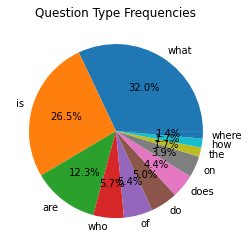

In [ ]:
import matplotlib.pyplot as plt

question_type_counts_list = list(question_type_counts.items())
question_type_counts_list.sort(key=lambda x: x[1], reverse=True)

question_types = [x[0] for x in question_type_counts_list]
frequencies = [x[1] for x in question_type_counts_list]

# Create a pie chart
plt.pie(frequencies, labels=question_types, autopct='%1.1f%%')

# Add a title
plt.title('Question Type Frequencies')

# Show the chart
plt.show()

In [ ]:
import json
with open('data/gqa/train_new.json') as f:
    questions = json.load(f)

list_of_all_questions = [x['sent'] for x in questions]

In [ ]:
import re
pattern = re.compile(r'\b(what|how|is|are|who|when|where|why|do|on|does|what\'s|the|where|of)\b', re.IGNORECASE)

question_type_counts = {}

# Loop over each question in the dataset
for question in list_of_all_questions:
    match = pattern.search(question)
    if match:
        # Increment the count for the matched question type
        question_type = match.group().lower()
        question_type_counts[question_type] = question_type_counts.get(question_type, 0) + 1
sorted_question_types = sorted(question_type_counts.items(), key=lambda x: x[1], reverse=True)

for question_type, count in sorted_question_types:
    print(f'{question_type}: {count}')

what: 301452
is: 249212
are: 115227
who: 53475
of: 52272
do: 47583
does: 41428
on: 36646
the: 16110
how: 15996
where: 13248


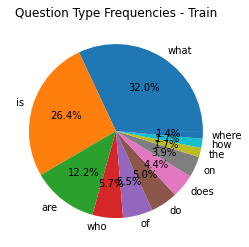

In [ ]:
import matplotlib.pyplot as plt

question_type_counts_list = list(question_type_counts.items())
question_type_counts_list.sort(key=lambda x: x[1], reverse=True)

question_types = [x[0] for x in question_type_counts_list]
frequencies = [x[1] for x in question_type_counts_list]

# Create a pie chart
plt.pie(frequencies, labels=question_types, autopct='%1.1f%%')

# Add a title
plt.title('Question Type Frequencies - Train')

# Show the chart
plt.show()

### On baseline

In [ ]:
import json

with open('data/gqa/valid_new.json') as f:
    valid_questions = json.load(f)


valid_keys = [question_type  for question_type, count in sorted_question_types_valid]

for qtype in valid_keys:
    filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith(qtype)]
    # Write the filtered dataset to a new JSON file
    with open('data/gqa/' + qtype + '_questions.json', 'w') as f:
        json.dump(filtered_questions, f)

In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/what_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set what

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 181 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 42225 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1175 seconds.
Use 42225 data in torch dataset

0.7571343990526939


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/is_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set is

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 175 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 30741 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1174 seconds.
Use 30741 data in torch dataset

0.9154549298981816


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/are_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set are

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 183 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 15896 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1194 seconds.
Use 15896 data in torch dataset

0.9219300452944137


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/who_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set who

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 187 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 7508 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1193 seconds.
Use 7508 data in torch dataset

0.7650506126798082


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/of_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set of

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 186 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 318 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1177 seconds.
Use 318 data in torch dataset

0.7169811320754716


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/do_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set do

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 188 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 12091 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 8006 seconds.
Use 12091 data in torch dataset

0.8742866594988008


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/does_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set does

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 370 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 5649 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1210 seconds.
Use 5649 data in torch dataset

0.8520092051690564


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/on_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set on

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 198 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 5190 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1191 seconds.
Use 5190 data in torch dataset

0.9472061657032755


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/the_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set the

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 188 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 2129 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1193 seconds.
Use 2129 data in torch dataset

0.7228745890089244


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/how_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set how

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 184 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 2204 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1194 seconds.
Use 2204 data in torch dataset

0.7681488203266787


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/where_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_onlytrain/BEST --test valid --batchSize 1024
# On validation-set where

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 187 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_onlytrain/BEST
Load 1819 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1199 seconds.
Use 1819 data in torch dataset

0.7053326003298516


#### On best sg model

In [ ]:
import json 

with open('/content/modifiers_dict.json') as f:
    mods = json.load(f)

In [ ]:
import json 
with open('data/gqa/val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('data/gqa/valid_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id']
        if str(image_id) in scene_graphs:
            scene_graph = scene_graphs[str(image_id)]
            objects = scene_graph['objects']
        else:
            continue
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            object_list.append(object_name.lower())
            object_list.extend(object_name.split())

        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                required_objects.append(i.lower())
            elif i.lower() != "" and i.lower() in mods:
                for j in mods[i]:
                    if j.lower() in object_list:
                        required_objects.append(j.lower())
            
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            attributes = object_data['attributes']
            attribute_text = ' '.join(attributes)
            object_text = ""
            if attribute_text:
                object_text = f"{attribute_text} "
            object_text += object_name
            if object_name.split(" ")[0].lower() in required_objects:
                object_texts.append(object_text)

    
        for object_id, object_data in objects.items():
            object_name = object_data['name']
            relations = object_data['relations']
            if object_name.split(" ")[0].lower() in required_objects:
                for relation in relations:
                    relation_name = relation['name']
                    related_object_id = relation['object']
                    related_object_name = objects[related_object_id]['name']
                    relation_text = f"{object_name} {relation_name} {related_object_name}"
                    relation_texts.append(relation_text)
        scene_text = ', '.join(list(set(object_texts)) + relation_texts)                
        question['sent'] += f" ({scene_text})"


# save dictionary as JSON file
with open("data/gqa/valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
import json

with open('data/gqa/valid.json') as f:
    valid_questions = json.load(f)

valid_keys = [question_type  for question_type, count in sorted_question_types_valid]

for qtype in valid_keys:
    filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith(qtype)]
    # Write the filtered dataset to a new JSON file
    with open('data/gqa/' + qtype + '_questions.json', 'w') as f:
        json.dump(filtered_questions, f)

In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/what_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set what

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 185 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 42225 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1202 seconds.
Use 42225 data in torch dataset

0.8259088217880403


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/is_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set is

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 403 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 30741 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1211 seconds.
Use 30741 data in torch dataset

0.9494811489541655


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/are_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set are

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 187 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 15896 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1184 seconds.
Use 15896 data in torch dataset

0.9372169099144438


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/who_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set who

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 189 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 7508 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1197 seconds.
Use 7508 data in torch dataset

0.7635855087906234


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/of_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set of

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 179 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 318 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1188 seconds.
Use 318 data in torch dataset

0.8962264150943396


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/do_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set do

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 576 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 12091 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1179 seconds.
Use 12091 data in torch dataset

0.9459101811264577


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/does_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set does

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 176 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 5649 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1201 seconds.
Use 5649 data in torch dataset

0.9486634802619933


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/on_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set on

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 208 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 5190 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1221 seconds.
Use 5190 data in torch dataset

0.953757225433526


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/the_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set the

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 195 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 2129 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1176 seconds.
Use 2129 data in torch dataset

0.8492249882573979


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/how_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set how

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 202 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 2204 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1173 seconds.
Use 2204 data in torch dataset

0.8725045372050817


In [ ]:
! rm -rf data/gqa/valid.json
! mv data/gqa/where_questions.json data/gqa/valid.json

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test valid --batchSize 1024
# On validation-set where

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 193 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_context_spec/BEST
Load 1819 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1177 seconds.
Use 1819 data in torch dataset

0.8301264431006047


### SG Generator


In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
path2 = '/content/gdrive/MyDrive/QA/res/'

In [ ]:
with open(path2 + 'processed_train.pkl', 'rb') as f:
    trainsgg = pickle.load(f)

In [ ]:
with open(path2 + 'processed_test.pkl', 'rb') as f:
    testsgg = pickle.load(f)

In [ ]:
testsgg['2405722.jpg']

'clouds in sky. head to the right of feathers. feathers to the right of head. head to the left of feathers. feathers to the left of head. tree to the left of feathers. feathers to the left of tree. feathers to the right of tree. tree to the right of feathers. tree to the right of feathers. feathers to the right of tree. feathers to the left of tree. tree to the left of feathers. tree to the right of bird. wall to the right of feathers. bird to the right of tree. feathers to the right of wall. tree to the left of bird. bird to the left of tree. head to the right of tree. tree to the right of head. feathers to the left of wall. wall to the left of feathers. tree to the left of head. head to the left of tree. leaves to the right of feathers. feathers to the right of leaves. wall to the right of beak. feathers to the left of leaves. leaves to the left of feathers. feathers to the right of eye. beak to the right of wall. eye to the left of feathers. eye to the right of feathers. feathers to

In [ ]:
import json 

with open('/content/modifiers_dict.json') as f:
    mods = json.load(f)

In [ ]:
import json 
with open('data/gqa/val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('data/gqa/valid_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id'] + '.jpg'
        if image_id in trainsgg:
          scene_text =  trainsgg[image_id]
        elif image_id in testsgg:
          scene_text = testsgg[image_id]
        else:
          scene_text = " "       
        question['sent'] += f" ({scene_text})"

# save dictionary as JSON file
with open("data/gqa/valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
import json 
with open('data/gqa/train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('data/gqa/train_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id'] + '.jpg'
        if image_id in trainsgg:
          scene_text =  trainsgg[image_id]
        elif image_id in testsgg:
          scene_text = testsgg[image_id]
        else:
          scene_text = " "       
        question['sent'] += f" ({scene_text})"

# save dictionary as JSON file
with open("data/gqa/train.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
%cd ../..

/content/gdrive/MyDrive/.shared


In [ ]:
!ls data/vg_gqa_imgfeat

gqa_testdev_obj36.tsv  vg_gqa_obj36.tsv


In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg_sggen
# Finetune test with sg added

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 2769 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

100% 231508/231508 [00:00<00:00, 1327188.54B/s]
100% 407873900/407873900 [00:09<00:00, 41997345.56B/s]
LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
  0% 0/29468 [00:00<?, ?it/s]/content/gdrive/MyDrive/.shared/Project/lxmert/src/lxrt/optimization.py:142: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  

In [ ]:
!bash run/gqa_test.bash 0 gqa_lxr955_sg_context_spec_results --load snap/gqa/gqa_lxr955_sg_context_spec/BEST --test testdev --batchSize 1024


### Context Specific for SGG

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
path2 = '/content/gdrive/MyDrive/QA/res/'

In [ ]:
with open(path2 + 'processed_train.pkl', 'rb') as f:
    trainsgg = pickle.load(f)

In [ ]:
with open(path2 + 'processed_test.pkl', 'rb') as f:
    testsgg = pickle.load(f)

In [ ]:
import json 

with open('/content/modifiers_dict.json') as f:
    mods = json.load(f)

In [ ]:
import json 
with open('data/gqa/val_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('data/gqa/valid_new.json') as f:
    questions = json.load(f)

for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id'] + '.jpg'
        if image_id in trainsgg:
          scene_text =  trainsgg[image_id]
        elif image_id in testsgg:
          scene_text = testsgg[image_id]
        else:
          scene_text = " "       

        object_list = []
        object_list.extend(mods.keys())
        object_list.extend(mods.values())
        query = question["sent"]
        required_objects = []
        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                if i.lower() != "":
                  required_objects.append(i.lower())

                if i.lower() in mods:
                  required_objects.extend(mods[i])
        
        fin_text = ""
        for i in scene_text.split("."):
          for j in required_objects:
            if j in i:
              fin_text += i + "."
              break
        
        question['sent'] += f" ({fin_text})"

# save dictionary as JSON file
with open("data/gqa/valid.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
import json 
with open('data/gqa/train_sceneGraphs.json') as f:
    scene_graphs = json.load(f)

with open('data/gqa/train_new.json') as f:
    questions = json.load(f)


for question in questions:
        object_texts = []
        object_list = []        
        query = question['sent']
        required_objects = []
        relation_texts = []
        image_id = question['img_id'] + '.jpg'
        if image_id in trainsgg:
          scene_text =  trainsgg[image_id]
        elif image_id in testsgg:
          scene_text = testsgg[image_id]
        else:
          scene_text = " "       

        object_list = []
        object_list.extend(mods.keys())
        object_list.extend(mods.values())
        query = question["sent"]
        required_objects = []
        for i in query.replace(",", " ").replace(".", " ").replace("?", " ").split(" "):
            if i.lower() in object_list:
                if i.lower() != "":
                  required_objects.append(i.lower())

                if i.lower() in mods:
                  required_objects.extend(mods[i])
        
        fin_text = ""
        for i in scene_text.split("."):
          for j in required_objects:
            if j in i:
              fin_text += i + "."
              break
        
        question['sent'] += f" ({fin_text})"


# save dictionary as JSON file
with open("data/gqa/train.json", "w") as outfile:
    json.dump(questions, outfile)    

In [ ]:
!bash run/gqa_finetune.bash 0 gqa_lxr955_sg_sggen_ctx
# Finetune test with sg added context specific

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1473 seconds.
Use 943000 data in torch dataset

Load 132062 data from split(s) valid.
Use 132062 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Load QA pre-trained LXMERT from snap/pretrained/model 
Loaded 1736 answers from LXRTQA pre-training and 106 not

Total Iters: 117872
Splits in Train data: ['train']
Splits in Valid data: ['valid']
Valid Oracle: 100.00
  0% 0/29468 [00:00<?, ?it/s]/content/gdrive/MyDrive/.shared/Project/lxmert/src/lxrt/optimization.py:142: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  next_m.mul_(beta1).add_(1 - beta1, grad)
100% 2

### Checking each question type

In [ ]:
valid_keys

['what', 'is', 'are', 'who', 'of', 'do', 'does', 'on', 'the', 'how', 'where']

In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('what')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set what

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 418 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 42225 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1237 seconds.
Use 42225 data in torch dataset

0.7567081113084666


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('is')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set is

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 249 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 30741 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1168 seconds.
Use 30741 data in torch dataset

0.9162031163592597


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('are')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set are

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 224 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 15896 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1204 seconds.
Use 15896 data in torch dataset

0.920420231504781


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('who')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set who

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 195 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 7508 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1203 seconds.
Use 7508 data in torch dataset

0.7614544485881726


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('of')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set of

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 233 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 318 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1190 seconds.
Use 318 data in torch dataset

0.6981132075471698


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('do')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set do

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 234 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 12091 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1200 seconds.
Use 12091 data in torch dataset

0.8721362997270697


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('does')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set does

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 229 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 5649 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1176 seconds.
Use 5649 data in torch dataset

0.8489998229775182


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('on')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set on

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 191 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 5190 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1176 seconds.
Use 5190 data in torch dataset

0.9435452793834297


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('the')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set the

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 196 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 2129 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 148854 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 1173 seconds.
Use 2129 data in torch dataset

0.7228745890089244


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('how')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set how

Load 943000 data from split(s) train.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv
Loaded 512 images in file data/vg_gqa_imgfeat/vg_gqa_obj36.tsv in 195 seconds.
Use 4003 data in torch dataset

LXRT encoder with 9 l_layers, 5 x_layers, and 5 r_layers.
Total Iters: 30
Load model from snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST
Load 2204 data from split(s) valid.
Start to load Faster-RCNN detected objects from data/vg_gqa_imgfeat/vg_gqa_obj36.tsv


In [ ]:
with open('data/gqa/valid_fin.json') as f:
    valid_questions = json.load(f)

filtered_questions = [q for q in valid_questions if q['sent'].lower().startswith('where')]
# Write the filtered dataset to a new JSON file
with open('data/gqa/valid.json', 'w') as f:
    json.dump(filtered_questions, f)

In [ ]:
!bash run/gqa_test.bash 0 res1 --load snap/gqa/gqa_lxr955_sg_sggen_ctx/BEST --test valid --batchSize 1024
# On validation-set where